In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bigquery_stats  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %sql  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%m

In [3]:
# reading nyc airbnb listings csv

df = pd.read_csv('/kaggle/input/airbnbnyc2019/airbnb_nyc_2019.csv')
df

,id,name,host_id,host_name,boroughs,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
# looking at the sum of the nulls in all columns

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
boroughs                              0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   boroughs                        48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'boroughs', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [7]:
# creating a new subset of dataset to inquire

new_df = df[['id','name','host_id','host_name','boroughs','neighbourhood','room_type','price',
             'minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
new_df

,id,name,host_id,host_name,boroughs,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2


In [8]:
# looking at the top 5 host listings count by the boroughs that they are in

hosts_areas = new_df.groupby(['host_name','boroughs'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count',ascending=False).head(5)

,host_name,boroughs,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


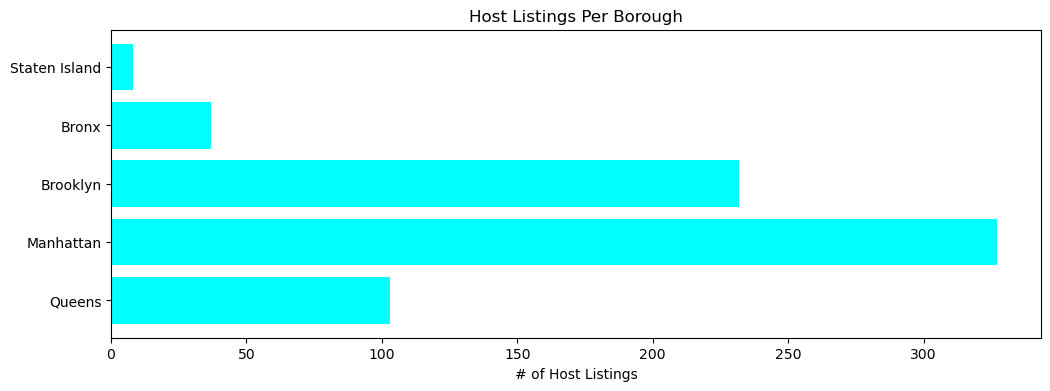

In [9]:
# plotting the host listings per boroughs in nyc, manhattan clearly shows more listings 

area = hosts_areas['boroughs']
listings_count = hosts_areas['calculated_host_listings_count']

plt.rcParams['figure.figsize']=(12,4)
plt.barh(area, listings_count, color='cyan')

plt.xlabel("# of Host Listings")
plt.title("Host Listings Per Borough")
plt.show()

In [10]:
# grouping boroughs by the top 5 count of number of reviews

areas_reviews = new_df.groupby(['boroughs'])['number_of_reviews'].max().reset_index()
areas_reviews.head(5)

,boroughs,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


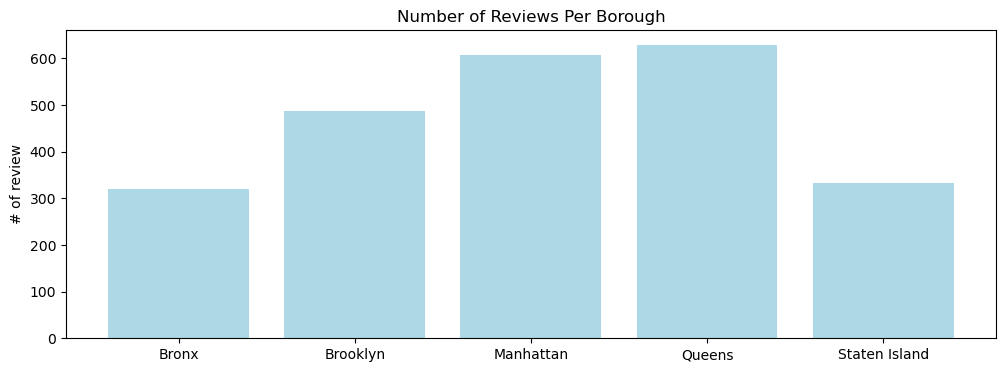

In [11]:
# this bar plot clearly shows the number of reviews are highest in queens

area1 = areas_reviews['boroughs']
review = areas_reviews['number_of_reviews']

plt.rcParams['figure.figsize']=(12,4)
plt.bar(area1, review, color="lightblue")

plt.ylabel("# of review")
plt.title("Number of Reviews Per Borough")
plt.show()

In [12]:
# looking at the average price per the borough

area_price = new_df.groupby(['boroughs'])['price'].mean().reset_index()
area_price.sort_values(by='price',ascending=False).head(5)

,boroughs,price
2,Manhattan,196.875814
1,Brooklyn,124.383207
4,Staten Island,114.812332
3,Queens,99.517649
0,Bronx,87.496792


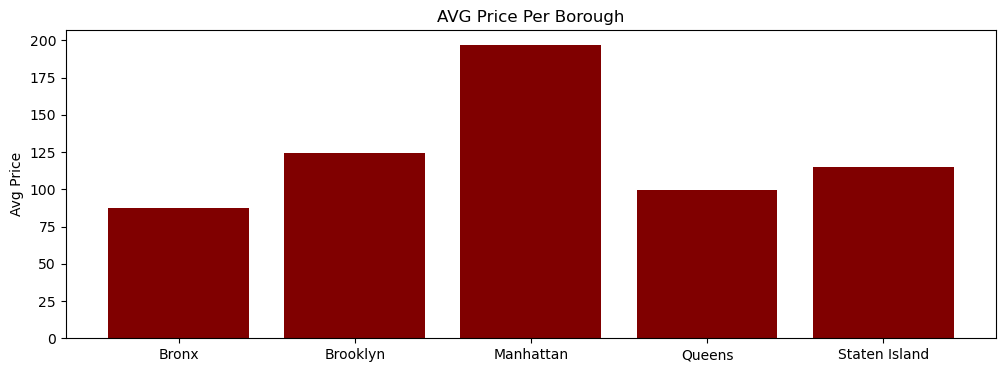

In [13]:
# plotting this bar plot clearly indicates that the highest average price of an airbnb is in Manhattan

price = area_price['price']
area2 = area_price['boroughs']

plt.rcParams['figure.figsize']=(12,4)
plt.bar(area2, price, color='maroon')

plt.ylabel("Avg Price")
plt.title("AVG Price Per Borough")
plt.show()


In [14]:
# also showing the average price of the type of room

area_room = new_df.groupby(['room_type'])['price'].mean().reset_index()
area_room.sort_values(by='price', ascending=False)

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


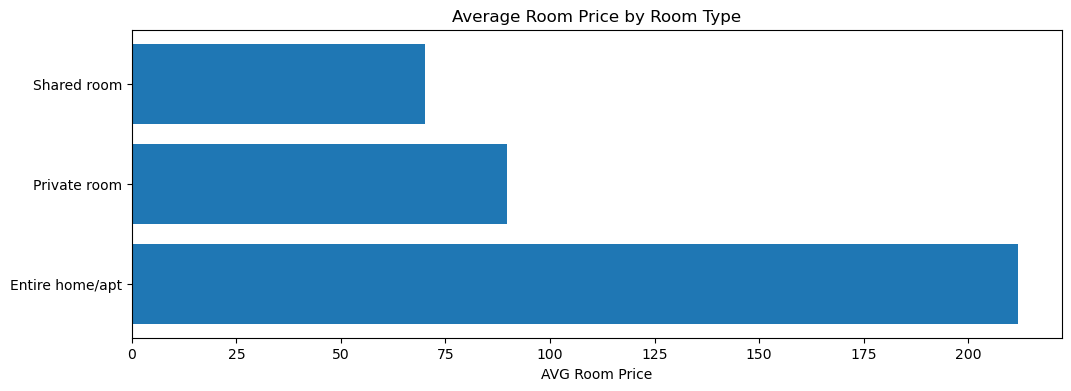

In [15]:
# this horizontal bar plot clearly indicates that 'entire home/apt' type of airbnb is the highest priced and private room coming in 2nd

rooms = area_room['room_type']
price1 = area_room['price']

plt.rcParams['figure.figsize'] = (12,4)
plt.barh(rooms, price1)

plt.xlabel("AVG Room Price")
plt.title("Average Room Price by Room Type")
plt.show()

In [16]:
# looking at the busiest hosts by number_of_reviews

busiest_hosts = new_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(7)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480


Text(0.5, 1.0, 'Top 7 Busiest Hosts by Number of Reviews')

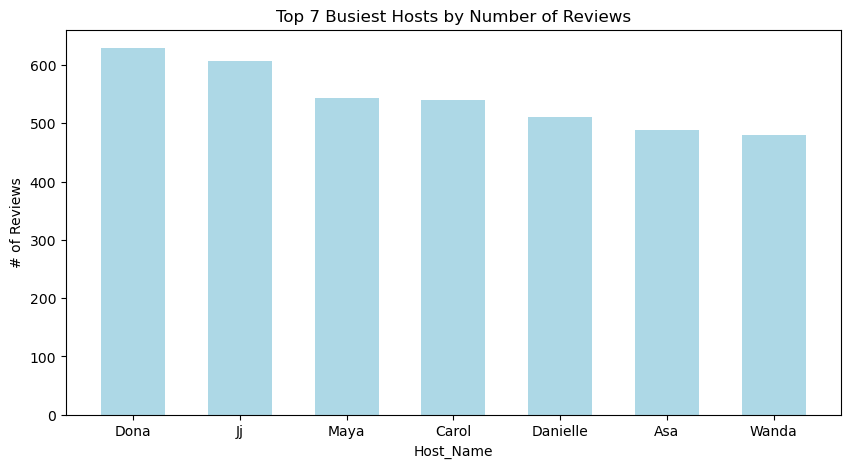

In [17]:
# this bar plot indicates that Dona is the host name with highest number of reviews

name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

plt.rcParams['figure.figsize']=(10,5)
plt.bar(name, reviews, color='lightblue', width=0.6)

plt.xlabel("Host_Name")
plt.ylabel("# of Reviews")
plt.title("Top 7 Busiest Hosts by Number of Reviews")